In [1]:
import platform
print(platform.python_version())



3.12.6


In [2]:
!pip install klib dtale joblib pandas-profiling


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas numpy ydata-profiling matplotlib seaborn scipy scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade setuptools


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import os

In [6]:
train_data=pd.read_csv("D:/Desktop_documents/7th_Semester/UNIVERSITY/G2-BIG_DATA\PROJECT/Train.csv")
test_data=pd.read_csv("D:/Desktop_documents/7th_Semester/UNIVERSITY/G2-BIG_DATA/PROJECT/Test.csv")

In [7]:
num_instances = train_data.shape[0]
num_instances
#rows

8523

In [8]:
num_attributes = train_data.shape[1]
num_attributes

12

In [9]:
# Display basic information
print(train_data.info())

for column in train_data.columns:
    print(f"{column}: {train_data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Item_Identifier: ['FDA15' 'DRC01' 'FDN15

In [10]:
data = train_data.shape
print(data)
#my data has 12 columns and 8523 rows

(8523, 12)


In [11]:
print(train_data.columns)
#our target = Item_Outlet_Sales
#sales of the product in the particular store

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [12]:
train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
print(train_data.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [14]:
train_data.sample(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5677,FDD29,12.150,Low Fat,0.018395,Frozen Foods,251.6698,OUT013,1987,High,Tier 3,Supermarket Type1,6088.0752
4016,FDO40,17.100,Low Fat,0.054613,Frozen Foods,150.2392,OUT010,1998,NaN,Tier 3,Grocery Store,596.5568
933,NCN14,NaN,Low Fat,0.160936,Others,184.2608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
4512,NCP17,19.350,Low Fat,0.027827,Health and Hygiene,65.6168,OUT018,2009,Medium,Tier 3,Supermarket Type2,383.5008
7052,FDT52,9.695,Regular,0.047623,Frozen Foods,246.2144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3675.2160
7540,FDG59,15.850,Low Fat,0.043411,Starchy Foods,39.4164,OUT018,2009,Medium,Tier 3,Supermarket Type2,154.4656
4139,FDY40,15.500,Regular,0.086185,Frozen Foods,50.9692,OUT018,2009,Medium,Tier 3,Supermarket Type2,394.1536
993,NCM31,6.095,Low Fat,0.081656,Others,143.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2836.3080
5626,FDC44,15.600,Low Fat,0.172947,Fruits and Vegetables,114.1518,OUT045,2002,NaN,Tier 2,Supermarket Type1,1821.6288
6180,FDY40,15.500,Regular,0.085764,Frozen Foods,49.0692,OUT013,1987,High,Tier 3,Supermarket Type1,295.6152


In [15]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
train_data.describe(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [17]:
train_data.isnull().sum()

#check null values in dataset
#info : 1463 values are missing in column "Item_Weight"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
missing_data = train_data.isnull()
missing_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
train_data.duplicated().any()
#Taking care of duplicate values

False

In [21]:
test_data.duplicated().any()

False

In [22]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
#Handling The missing values
train_data['Item_Weight'] 

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [24]:
#Handling The missing values
train_data['Outlet_Size'] 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [25]:
#univariate Imputation
#Filling Missing Values using information from the column that has missing data
mean_weight = train_data['Item_Weight'].mean()

In [26]:
median_weight = train_data['Item_Weight'].median()

In [27]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [28]:
train_data['Item_Weight_mean']=train_data['Item_Weight'].fillna(mean_weight)
train_data['Item_Weight_median']=train_data['Item_Weight'].fillna(median_weight)

In [29]:
print("Original Weight variable variance",train_data['Item_Weight'].var())
print("Item Weight variance after mean imputation",train_data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",train_data['Item_Weight_median'].var())
#These variances show that both imputations reduced the variance slightly.

Original Weight variable variance 21.561688259836558
Item Weight variance after mean imputation 17.86012173506058
Item Weight variance after median imputation 17.869561454073647


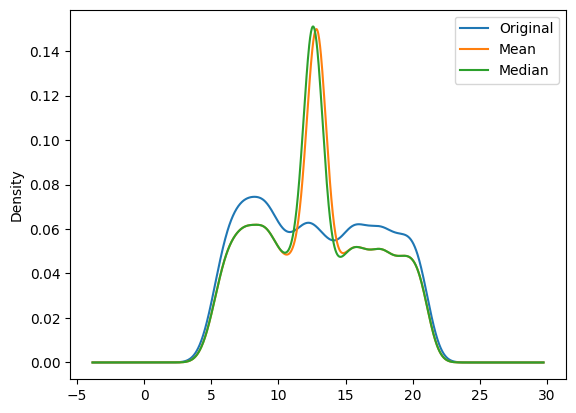

In [30]:
train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

train_data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

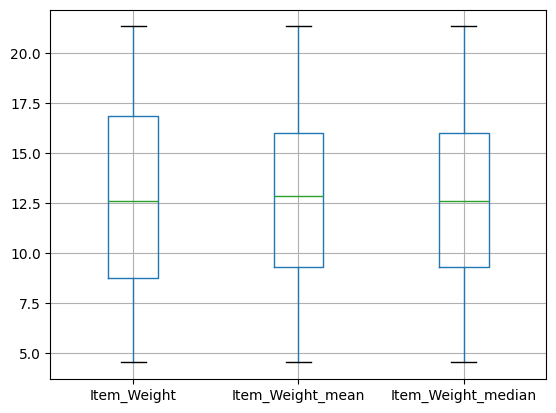

In [31]:
train_data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()
#spread of the data became smaller. 

In [32]:
train_data['Item_Weight_interploate']=train_data['Item_Weight'].interpolate(method="linear")
test_data['Item_Weight_interploate']=test_data['Item_Weight'].interpolate(method="linear")


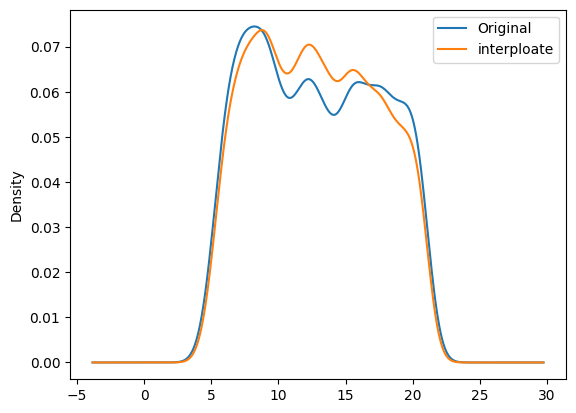

In [33]:
train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()
# a better method
#better alignment with the original data 

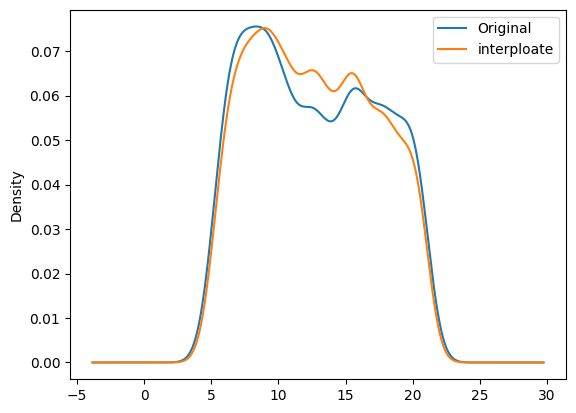

In [34]:
test_data['Item_Weight'].plot(kind = "kde",label="Original")

test_data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()
# a better method

In [35]:
#Multivariate Imputaion
from sklearn.impute import KNNImputer

In [36]:
knn = KNNImputer(n_neighbors=10,weights="distance")
#creating an instance of KNNImputer

In [37]:
train_data['knn_imputer']= knn.fit_transform(train_data[['Item_Weight']]).ravel() 

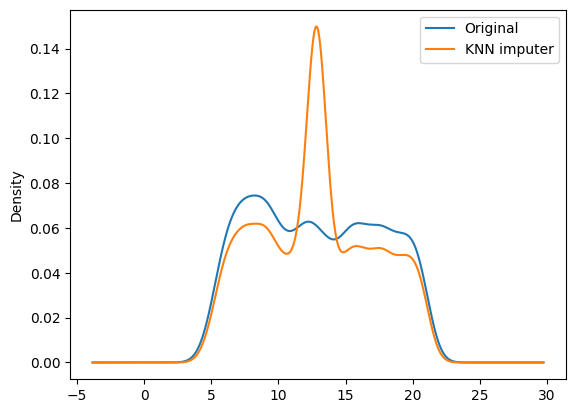

In [38]:
train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [39]:
train_data = train_data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [40]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [41]:
test_data = test_data.drop(['Item_Weight'],axis=1)

In [42]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_interploate         0
dtype: int64

In [43]:
#missing values for column 'Outlet_size'
#categorical column
#using mode (most freq value)
train_data['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [44]:
train_data['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [45]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [46]:
train_data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [47]:
test_data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_interploate      0
dtype: int64

In [48]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [49]:
train_data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [50]:
train_data['Item_Fat_Content'].value_counts()
# inconsistent categorical data

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [51]:
test_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [52]:
train_data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [53]:
test_data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         3668
Regular    2013
Name: count, dtype: int64

In [54]:
#another column "Item_Visibility"
train_data['Item_Visibility'].value_counts()


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [55]:
test_data['Item_Visibility'].value_counts()


Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [56]:
    #handling 526 zeroes as missing values
    train_data['Item_Visibility_interpolate']=train_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')
    # replacing all occurrences of 0 in the Item_Visibility column with NaN 
    #Applying linear interpolation.

In [57]:
test_data['Item_Visibility_interpolate']=test_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')


In [58]:
train_data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

In [59]:
test_data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: count, Length: 5629, dtype: int64

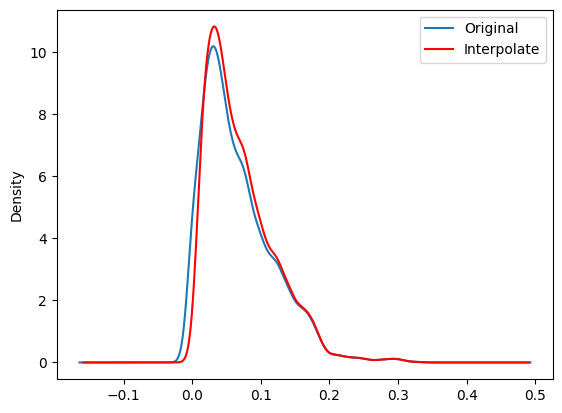

In [60]:
train_data['Item_Visibility'].plot(kind="kde",label="Original")

train_data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

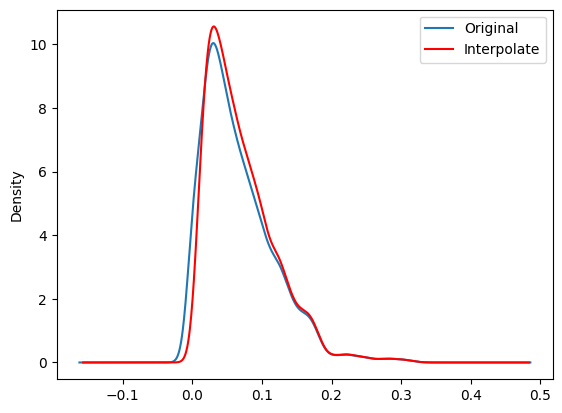

In [61]:
test_data['Item_Visibility'].plot(kind="kde",label="Original")

test_data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [62]:
train_data = train_data.drop('Item_Visibility',axis=1)
test_data = test_data.drop('Item_Visibility',axis=1)


In [63]:
#another column "Item_Type"
train_data['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [64]:
test_data['Item_Type'].value_counts()


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

In [65]:
#another column "Item_Identifier"
train_data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
NCQ02    3
FDX01    6
FDT48    6
FDP46    4
FDW27    6
Name: count, dtype: int64

In [66]:
test_data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
NCH18    4
DRD24    3
FDM28    4
DRM23    2
FDW04    5
Name: count, dtype: int64

In [67]:
train_data['Item_Identifier'] =train_data['Item_Identifier'].apply(lambda x : x[:2])
test_data['Item_Identifier'] =test_data['Item_Identifier'].apply(lambda x : x[:2])

In [68]:
train_data['Item_Identifier'].value_counts()


Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [69]:
test_data['Item_Identifier'].value_counts()


Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

In [70]:
#FD - FOOD
#NC - NON-CONSUMABLE
#DR - DRINKS

In [71]:
#another column "Outlet_Establishment_Year"
import datetime as dt
current_year = dt.datetime.today().year
current_year


2025

In [72]:
train_data['Outlet_age']= current_year - train_data['Outlet_Establishment_Year']
train_data['Outlet_age']

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_age, Length: 8523, dtype: int64

In [73]:
test_data['Outlet_age']= current_year - test_data['Outlet_Establishment_Year']
test_data['Outlet_age']

0       26
1       18
2       27
3       18
4       40
        ..
5676    28
5677    16
5678    23
5679    18
5680    23
Name: Outlet_age, Length: 5681, dtype: int64

In [74]:
test_data['Outlet_age']= current_year - test_data['Outlet_Establishment_Year']
test_data['Outlet_age']

0       26
1       18
2       27
3       18
4       40
        ..
5676    28
5677    16
5678    23
5679    18
5680    23
Name: Outlet_age, Length: 5681, dtype: int64

In [75]:
#OUTLET 0 IS 25 YEARS OLD
train_data = train_data.drop('Outlet_Establishment_Year',axis=1)


In [76]:
test_data = test_data.drop('Outlet_Establishment_Year',axis=1)


In [77]:
train_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [78]:
test_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [79]:
print(train_data["Item_MRP"].value_counts())

Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64


In [80]:
train_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [81]:
test_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [82]:
#start-value , end-value ,number of dividers
bins = np.linspace(min(train_data["Item_MRP"]), max(train_data["Item_MRP"]),5 )
bins

array([ 31.29  ,  90.1896, 149.0892, 207.9888, 266.8884])

In [83]:
group_names = ['Low', 'Medium', 'High', 'Premium']

In [84]:
train_data['Item_MRP-binned'] = pd.cut(train_data['Item_MRP'], bins, labels=group_names, include_lowest=True )
train_data[['Item_MRP','Item_MRP-binned']].head(20)

,Item_MRP,Item_MRP-binned
0,249.8092,Premium
1,48.2692,Low
2,141.6180,Medium
3,182.0950,High
4,53.8614,Low
5,51.4008,Low
6,57.6588,Low
7,107.7622,Medium
8,96.9726,Medium
9,187.8214,High


In [85]:

train_data['Item_MRP-binned'].value_counts()

Item_MRP-binned
Medium     2628
High       2525
Low        1973
Premium    1397
Name: count, dtype: int64

Text(0.5, 1.0, 'Item_MRP')

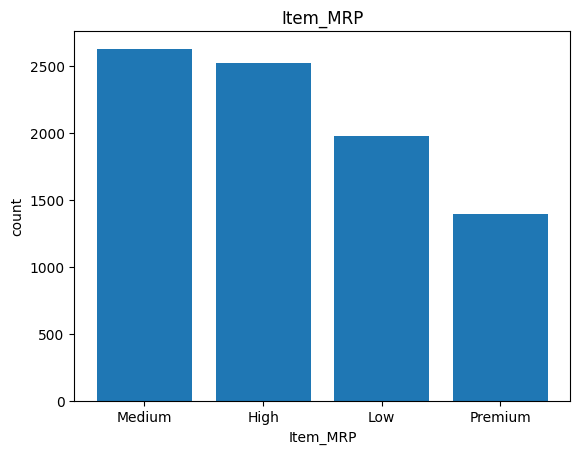

In [86]:
group_names2 = ['Medium', 'High', 'Low', 'Premium']
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names2,train_data["Item_MRP-binned"].value_counts())

plt.pyplot.xlabel("Item_MRP")
plt.pyplot.ylabel("count")
plt.pyplot.title("Item_MRP")


In [87]:
train_data.dtypes

Item_Identifier                  object
Item_Fat_Content                 object
Item_Type                        object
Item_MRP                        float64
Outlet_Identifier                object
Outlet_Size                      object
Outlet_Location_Type             object
Outlet_Type                      object
Item_Outlet_Sales               float64
Item_Weight_interploate         float64
Item_Visibility_interpolate     float64
Outlet_age                        int64
Item_MRP-binned                category
dtype: object

In [88]:
# Define the mapping
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Premium': 3
}

# Apply the mapping
train_data['Item_MRP-binned'] = train_data['Item_MRP-binned'].map(mapping)

print(train_data['Item_MRP-binned'].value_counts())
print(train_data['Item_MRP-binned'].dtype)  # Should show int64


Item_MRP-binned
1    2628
2    2525
0    1973
3    1397
Name: count, dtype: int64
category


In [89]:

from sklearn.preprocessing import OrdinalEncoder

train_data_encoded = train_data.copy()

cat_cols = train_data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    train_data_encoded[col]=oe.fit_transform(train_data_encoded[[col]])
    print(oe.categories_)


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array([0, 1, 2, 3], dtype=int64)]


In [90]:
from sklearn.preprocessing import OrdinalEncoder

test_data_encoded = test_data.copy()

cat_cols = test_data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    test_data_encoded[col]=oe.fit_transform(test_data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [91]:
from sklearn.preprocessing import OrdinalEncoder

train_data_encoded = train_data.copy()

cat_cols = train_data.select_dtypes(include=['object', 'category']).columns

In [92]:
for col in cat_cols:
    oe = OrdinalEncoder()
    
    # Fit and transform the column
    train_data_encoded[col] = oe.fit_transform(train_data_encoded[[col]])

    # Print the original categories and their assigned values
    print(f"Column: {col}")
    for i, category in enumerate(oe.categories_[0]):
        print(f"{category} -> {i}")
    print("\n")  # New line for readability

Column: Item_Identifier
DR -> 0
FD -> 1
NC -> 2


Column: Item_Fat_Content
LF -> 0
Regular -> 1


Column: Item_Type
Baking Goods -> 0
Breads -> 1
Breakfast -> 2
Canned -> 3
Dairy -> 4
Frozen Foods -> 5
Fruits and Vegetables -> 6
Hard Drinks -> 7
Health and Hygiene -> 8
Household -> 9
Meat -> 10
Others -> 11
Seafood -> 12
Snack Foods -> 13
Soft Drinks -> 14
Starchy Foods -> 15


Column: Outlet_Identifier
OUT010 -> 0
OUT013 -> 1
OUT017 -> 2
OUT018 -> 3
OUT019 -> 4
OUT027 -> 5
OUT035 -> 6
OUT045 -> 7
OUT046 -> 8
OUT049 -> 9


Column: Outlet_Size
High -> 0
Medium -> 1
Small -> 2


Column: Outlet_Location_Type
Tier 1 -> 0
Tier 2 -> 1
Tier 3 -> 2


Column: Outlet_Type
Grocery Store -> 0
Supermarket Type1 -> 1
Supermarket Type2 -> 2
Supermarket Type3 -> 3


Column: Item_MRP-binned
0 -> 0
1 -> 1
2 -> 2
3 -> 3




In [93]:
train_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
Item_MRP-binned                float64
dtype: object

In [94]:
test_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [95]:
train_data_encoded.corr(numeric_only = True)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age,Item_MRP-binned
Item_Identifier,1.000000,-0.166111,0.007456,0.032517,-0.009730,-0.000624,0.007661,0.001136,0.011236,0.056939,-0.046347,0.008551,0.033214
Item_Fat_Content,-0.166111,1.000000,-0.139434,0.006063,0.000764,-0.000622,-0.001598,0.002199,0.018719,-0.015030,0.048694,-0.003151,-0.002931
Item_Type,0.007456,-0.139434,1.000000,0.032651,0.001656,-0.001859,0.003084,0.003053,0.017048,0.028262,-0.033981,-0.004970,0.041415
Item_MRP,0.032517,0.006063,0.032651,1.000000,0.003319,0.006059,0.000232,-0.001975,0.567574,0.024839,-0.006544,-0.005020,0.963358
Outlet_Identifier,-0.009730,0.000764,0.001656,0.003319,1.000000,0.504603,-0.716176,0.099873,0.162325,-0.006937,-0.102528,-0.079035,0.002619
Outlet_Size,-0.000624,-0.000622,-0.001859,0.006059,0.504603,1.000000,-0.614311,-0.201483,-0.086182,-0.010973,0.073277,-0.193389,0.006434
Outlet_Location_Type,0.007661,-0.001598,0.003084,0.000232,-0.716176,-0.614311,1.000000,0.467219,0.089367,0.005960,-0.030813,0.089216,0.000759
Outlet_Type,0.001136,0.002199,0.003053,-0.001975,0.099873,-0.201483,0.467219,1.000000,0.401522,-0.000858,-0.179788,0.122304,-0.002074
Item_Outlet_Sales,0.011236,0.018719,0.017048,0.567574,0.162325,-0.086182,0.089367,0.401522,1.000000,0.014536,-0.133874,0.049135,0.547807
Item_Weight_interploate,0.056939,-0.015030,0.028262,0.024839,-0.006937,-0.010973,0.005960,-0.000858,0.014536,1.000000,-0.012096,-0.001220,0.023174


In [96]:
# Calculate the correlation matrix
correlation_matrix = train_data_encoded.corr()

# correlation of each attribute with 'Item_Outlet_Sales'
correlation_with_sales = correlation_matrix["Item_Outlet_Sales"]

# Sorting the correlations in descending order 
correlation_with_sales_sorted = correlation_with_sales.sort_values(ascending=False)

print(correlation_with_sales_sorted)


Item_Outlet_Sales              1.000000
Item_MRP                       0.567574
Item_MRP-binned                0.547807
Outlet_Type                    0.401522
Outlet_Identifier              0.162325
Outlet_Location_Type           0.089367
Outlet_age                     0.049135
Item_Fat_Content               0.018719
Item_Type                      0.017048
Item_Weight_interploate        0.014536
Item_Identifier                0.011236
Outlet_Size                   -0.086182
Item_Visibility_interpolate   -0.133874
Name: Item_Outlet_Sales, dtype: float64


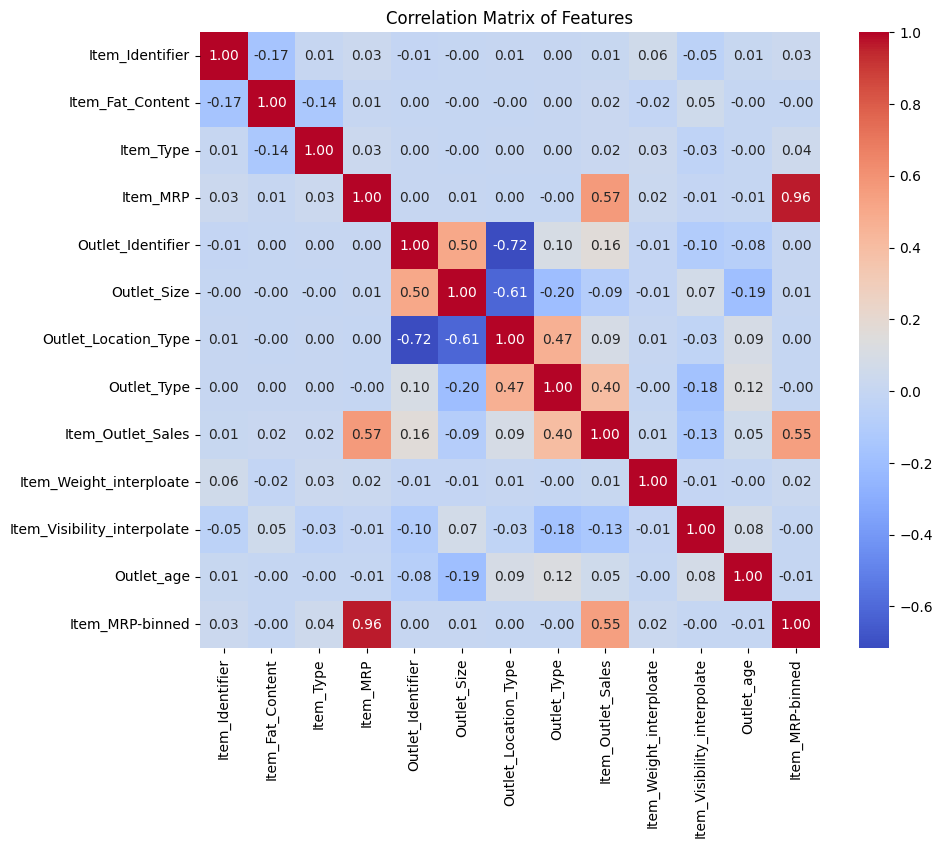

In [97]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
correlation_matrix = train_data_encoded.corr(numeric_only=True)

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [98]:
train_data_encoded['Item_Weight_interploate']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_interploate, Length: 8523, dtype: float64

In [99]:

train_data_encoded['Item_Visibility_interpolate']

0       0.016047
1       0.019278
2       0.016760
3       0.015755
4       0.014751
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility_interpolate, Length: 8523, dtype: float64

In [100]:
#Min-Max scaling transforms the values to a range of [0, 1].
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

# Applying Min-Max Scaling on  columns
train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']] = scaler.fit_transform(train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']])

print(train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']].head())


   Item_Weight_interploate  Item_Visibility_interpolate  Item_MRP
0                 0.282525                     0.038399  0.927507
1                 0.081274                     0.048346  0.072068
2                 0.770765                     0.040593  0.468288
3                 0.871986                     0.037500  0.640093
4                 0.260494                     0.034407  0.095805


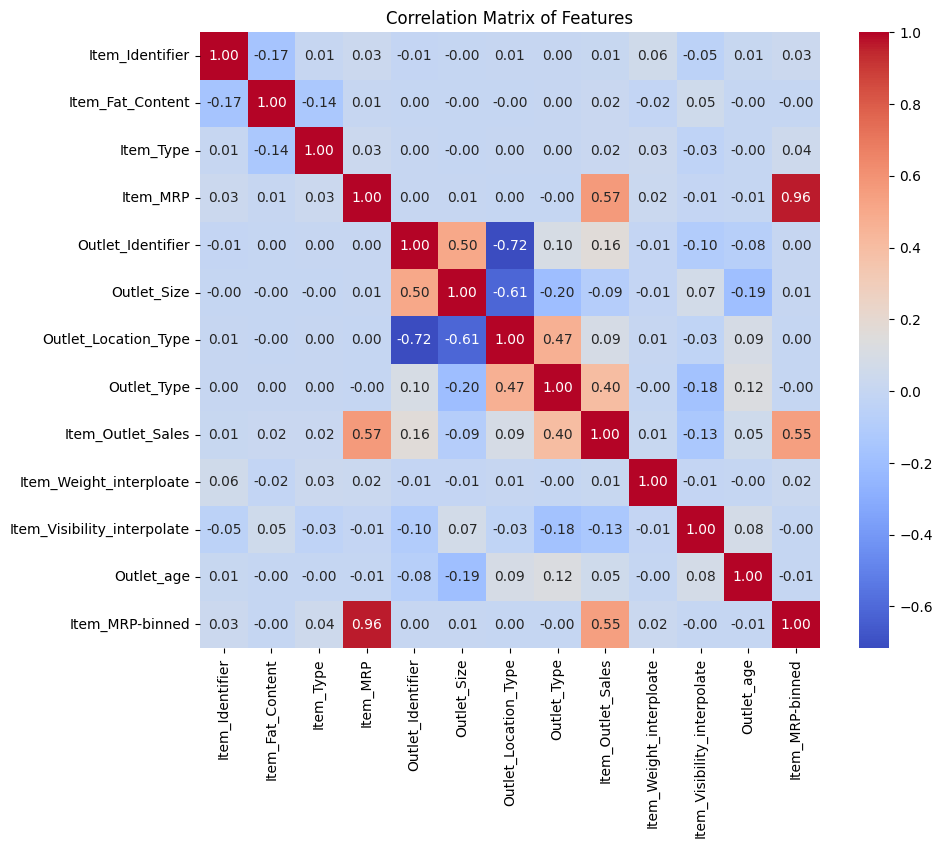

In [101]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
correlation_matrix = train_data_encoded.corr(numeric_only=True)

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [102]:
# Calculate the correlation matrix
correlation_matrix = train_data_encoded.corr()

# Get the correlation of each attribute with 'Item_Outlet_Sales'
correlation_with_sales = correlation_matrix["Item_Outlet_Sales"]

# Sort the correlations in descending order to find the most correlated attributes
correlation_with_sales_sorted = correlation_with_sales.sort_values(ascending=False)

print(correlation_with_sales_sorted)


Item_Outlet_Sales              1.000000
Item_MRP                       0.567574
Item_MRP-binned                0.547807
Outlet_Type                    0.401522
Outlet_Identifier              0.162325
Outlet_Location_Type           0.089367
Outlet_age                     0.049135
Item_Fat_Content               0.018719
Item_Type                      0.017048
Item_Weight_interploate        0.014536
Item_Identifier                0.011236
Outlet_Size                   -0.086182
Item_Visibility_interpolate   -0.133874
Name: Item_Outlet_Sales, dtype: float64


In [103]:
df_group_one = train_data_encoded[["Item_MRP-binned", "Item_Outlet_Sales"]]
df_group_one = df_group_one.groupby(["Item_MRP-binned"], as_index=False).mean()


In [104]:
df_group_one

,Item_MRP-binned,Item_Outlet_Sales
0,0.0,910.105406
1,1.0,1814.690343
2,2.0,2723.123846
3,3.0,3686.895857


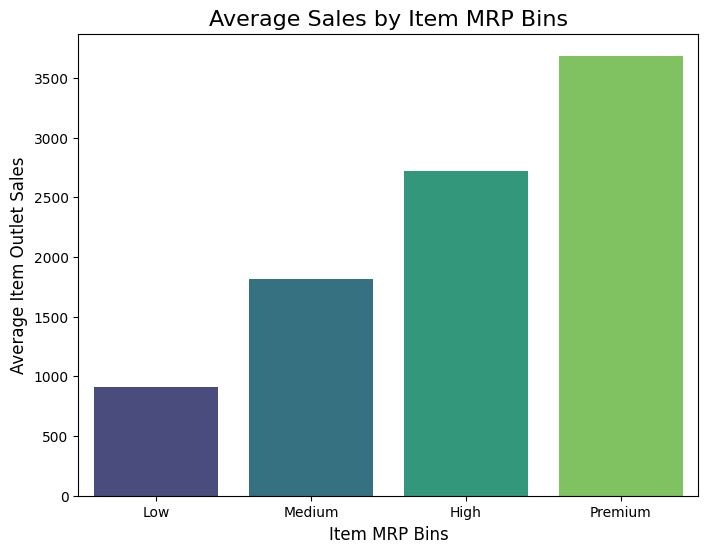

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

bin_labels = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Premium'}

plt.figure(figsize=(8,6))
sns.barplot(x='Item_MRP-binned', y='Item_Outlet_Sales', data=df_group_one, palette='viridis')

plt.xticks(ticks=range(len(bin_labels)), labels=[bin_labels[i] for i in range(len(bin_labels))])

# Adding titles and labels
plt.title('Average Sales by Item MRP Bins', fontsize=16)
plt.xlabel('Item MRP Bins', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.show()


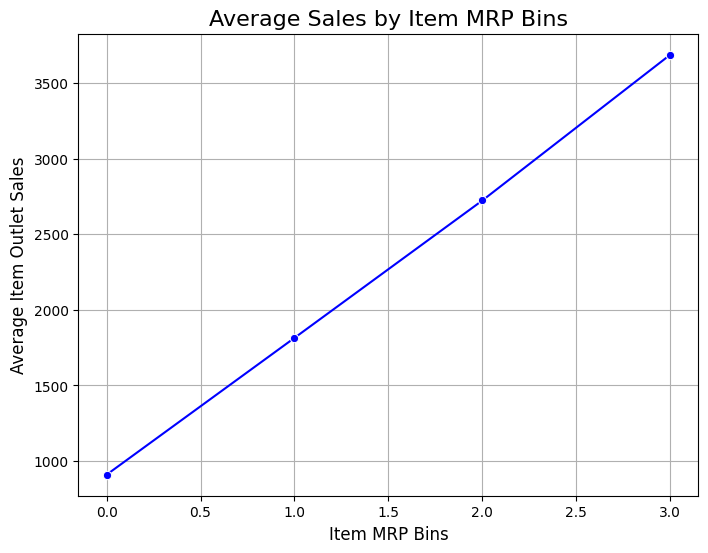

In [106]:
# Line plot to visualize the trend of sales across Item MRP Bins
plt.figure(figsize=(8,6))
sns.lineplot(x='Item_MRP-binned', y='Item_Outlet_Sales', data=df_group_one, marker='o', color='b')

# Adding titles and labels
plt.title('Average Sales by Item MRP Bins', fontsize=16)
plt.xlabel('Item MRP Bins', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.grid(True)
plt.show()


In [107]:
# Grouping by 'Outlet_Type' and calculating the mean of 'Item_Outlet_Sales'
df_group_two = train_data_encoded[["Outlet_Type", "Item_Outlet_Sales"]]
df_group_two = df_group_two.groupby(["Outlet_Type"], as_index=False).mean()

# Display the grouped results
df_group_two


,Outlet_Type,Item_Outlet_Sales
0,0.0,339.828500
1,1.0,2316.181148
2,2.0,1995.498739
3,3.0,3694.038558


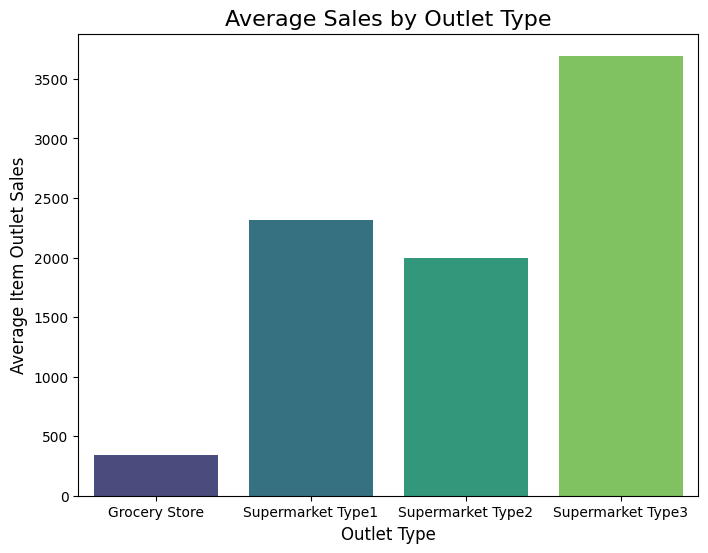

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

outlet_labels = {0: 'Grocery Store', 1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3'}

# Bar plot to visualize average sales for each Outlet_Type category
plt.figure(figsize=(8,6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_group_two, palette='viridis')

plt.xticks(ticks=range(len(outlet_labels)), labels=[outlet_labels[i] for i in range(len(outlet_labels))])

# Adding titles and labels
plt.title('Average Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.show()


In [109]:
train_data_encoded['Outlet_age'].value_counts()

Outlet_age
40    1463
38     932
26     930
28     930
21     930
23     929
16     928
18     926
27     555
Name: count, dtype: int64

In [110]:
average_sales_by_age = train_data_encoded.groupby('Outlet_age')['Item_Outlet_Sales'].mean().reset_index()
average_sales_by_age

,Outlet_age,Item_Outlet_Sales
0,16,1995.498739
1,18,2340.675263
2,21,2438.841866
3,23,2192.384798
4,26,2348.354635
5,27,339.351662
6,28,2277.844267
7,38,2298.995256
8,40,2483.677474


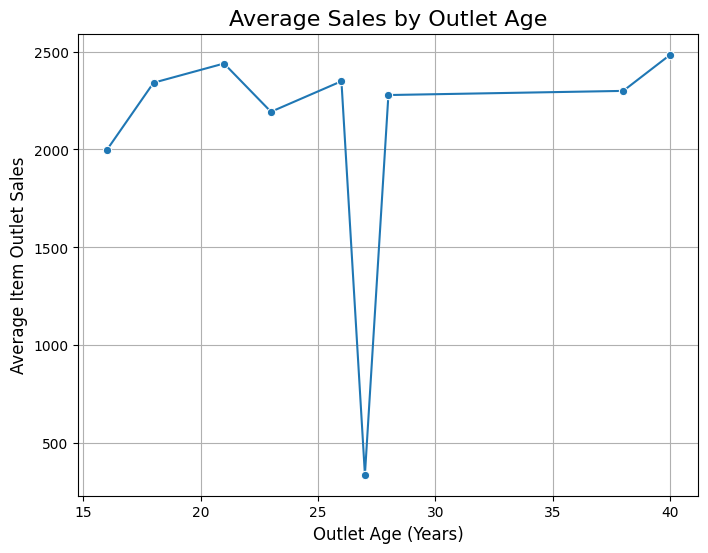

In [111]:
# Calculate the average sales by Outlet Age
average_sales_by_age = train_data_encoded.groupby('Outlet_age')['Item_Outlet_Sales'].mean().reset_index()

# Now you can plot the line graph
plt.figure(figsize=(8,6))
sns.lineplot(x='Outlet_age', y='Item_Outlet_Sales', data=average_sales_by_age, marker='o')

# Adding titles and labels
plt.title('Average Sales by Outlet Age', fontsize=16)
plt.xlabel('Outlet Age (Years)', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.grid(True)
plt.show()


In [112]:
correlation = train_data_encoded['Outlet_age'].corr(train_data_encoded['Item_Outlet_Sales'])
print(f"Correlation between Outlet Age and Item Outlet Sales: {correlation}")


Correlation between Outlet Age and Item Outlet Sales: 0.0491349704408209


In [113]:
df_gptest = train_data_encoded[["Outlet_age", "Outlet_Type", "Item_Outlet_Sales"]]

# Grouping results by Outlet Age and Outlet Type
grouped_test1 = df_gptest.groupby(["Outlet_age", "Outlet_Type"], as_index=False).mean()

print(grouped_test1)


   Outlet_age  Outlet_Type  Item_Outlet_Sales
0          16          2.0        1995.498739
1          18          1.0        2340.675263
2          21          1.0        2438.841866
3          23          1.0        2192.384798
4          26          1.0        2348.354635
5          27          0.0         339.351662
6          28          1.0        2277.844267
7          38          1.0        2298.995256
8          40          0.0         340.329723
9          40          3.0        3694.038558


In [114]:
# Get the correlation of 'Outlet_age' with other attributes
correlation_with_age = correlation_matrix["Outlet_age"].sort_values(ascending=False)
print(correlation_with_age)


Outlet_age                     1.000000
Outlet_Type                    0.122304
Outlet_Location_Type           0.089216
Item_Visibility_interpolate    0.077071
Item_Outlet_Sales              0.049135
Item_Identifier                0.008551
Item_Weight_interploate       -0.001220
Item_Fat_Content              -0.003151
Item_Type                     -0.004970
Item_MRP                      -0.005020
Item_MRP-binned               -0.005106
Outlet_Identifier             -0.079035
Outlet_Size                   -0.193389
Name: Outlet_age, dtype: float64


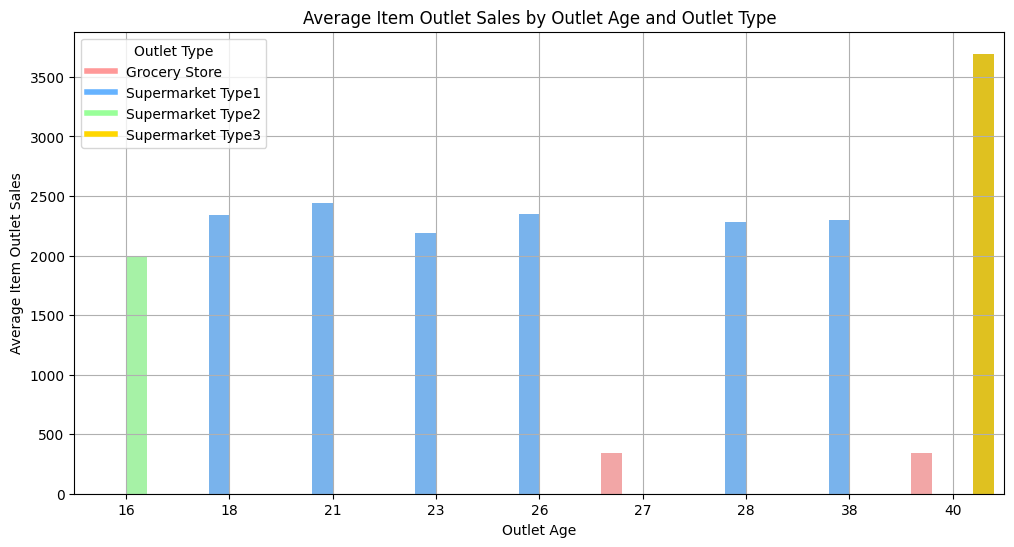

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Outlet Age and Outlet Type
grouped_sales = train_data_encoded.groupby(['Outlet_age', 'Outlet_Type'], as_index=False).mean()

custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']  # Example colors

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_sales, x='Outlet_age', y='Item_Outlet_Sales', hue='Outlet_Type', palette=custom_palette)
plt.title('Average Item Outlet Sales by Outlet Age and Outlet Type')
plt.xlabel('Outlet Age')
plt.ylabel('Average Item Outlet Sales')
plt.grid(True)

# Adding custom labels to the legend with corresponding colors
handles = [plt.Line2D([0], [0], color=custom_palette[i], lw=4) for i in range(len(custom_palette))]
plt.legend(handles=handles, 
           labels=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
           title='Outlet Type')

plt.show()


In [116]:
# grouping results
df_gptest = train_data_encoded[["Item_Fat_Content", "Item_Type", "Item_Outlet_Sales"]]
grouped_test1 = df_gptest.groupby(["Item_Fat_Content", "Item_Type"], as_index=False).mean()
grouped_test1
 
 

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,0.0,0.0,1764.509636
1,0.0,1.0,2183.434031
2,0.0,2.0,2425.411966
3,0.0,3.0,2208.714377
4,0.0,4.0,2145.174151
5,0.0,5.0,2117.535472
6,0.0,6.0,2182.405740
7,0.0,7.0,2139.221622
8,0.0,8.0,2010.000265
9,0.0,9.0,2258.784300


In [117]:
grouped_pivot = grouped_test1.pivot(index="Item_Type", columns="Item_Fat_Content")
grouped_pivot

Item_Outlet_Sales             
Item_Fat_Content               0.0          1.0
Item_Type                                      
0.0                    1764.509636  2147.340665
1.0                    2183.434031  2230.238058
2.0                    2425.411966  1925.464652
3.0                    2208.714377  2243.441202
4.0                    2145.174151  2370.875970
5.0                    2117.535472  2149.861640
6.0                    2182.405740  2400.571761
7.0                    2139.221622          NaN
8.0                    2010.000265          NaN
9.0                    2258.784300          NaN
10.0                   2035.616920  2241.218571
11.0                   1926.139702          NaN
12.0                   1907.786919  2899.263089
13.0                   2411.978843  2093.891196
14.0                   2035.452072  1854.065451
15.0                   2558.425815  2145.611115

In [118]:
grouped_pivot = grouped_pivot.fillna(0) #Fill missing values with 0
grouped_pivot

Item_Outlet_Sales             
Item_Fat_Content               0.0          1.0
Item_Type                                      
0.0                    1764.509636  2147.340665
1.0                    2183.434031  2230.238058
2.0                    2425.411966  1925.464652
3.0                    2208.714377  2243.441202
4.0                    2145.174151  2370.875970
5.0                    2117.535472  2149.861640
6.0                    2182.405740  2400.571761
7.0                    2139.221622     0.000000
8.0                    2010.000265     0.000000
9.0                    2258.784300     0.000000
10.0                   2035.616920  2241.218571
11.0                   1926.139702     0.000000
12.0                   1907.786919  2899.263089
13.0                   2411.978843  2093.891196
14.0                   2035.452072  1854.065451
15.0                   2558.425815  2145.611115

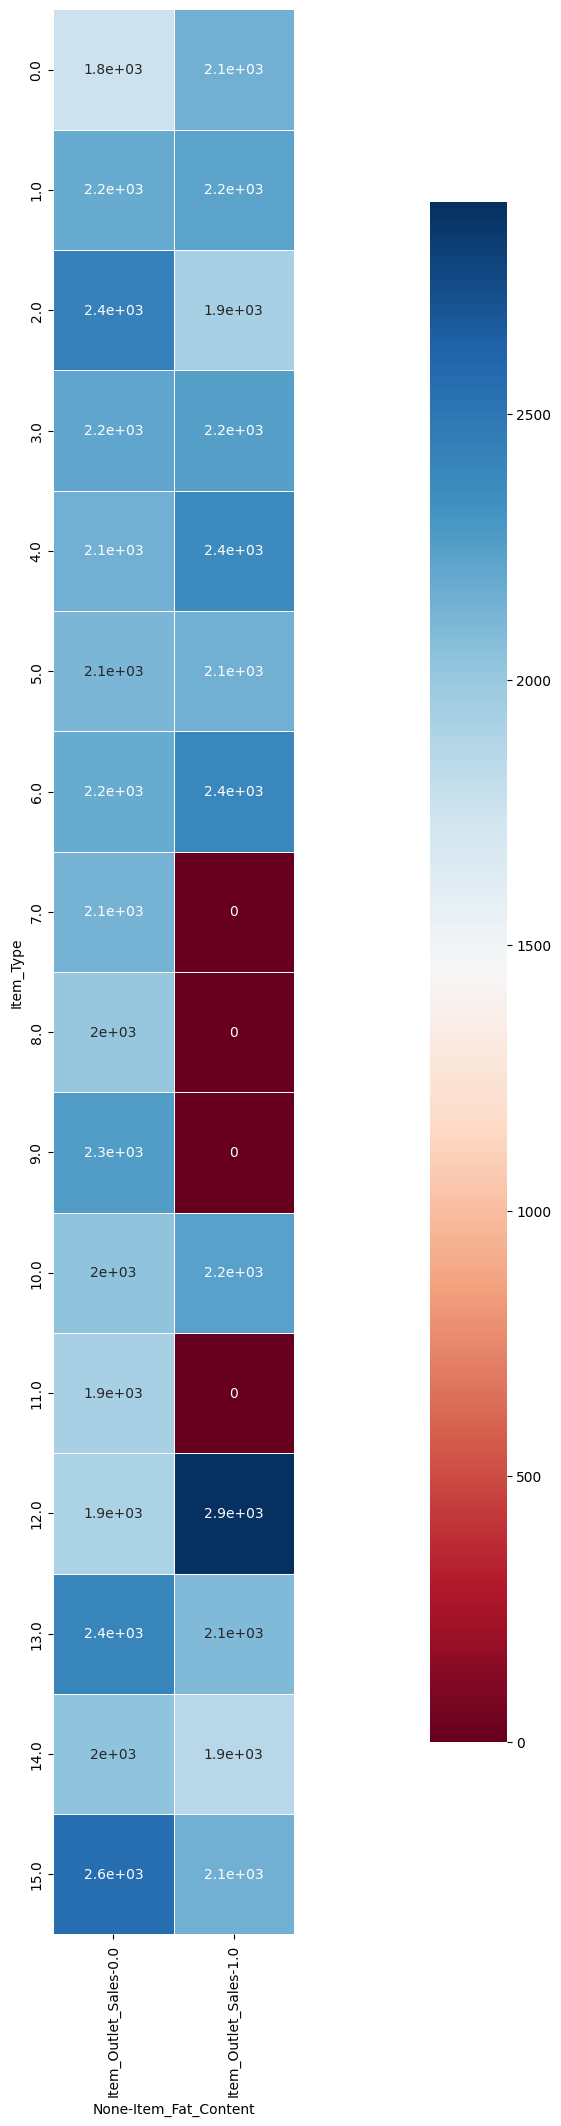

In [119]:
plt.figure(figsize=(35,25))  
sns.heatmap(grouped_pivot, cmap='RdBu', annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .8})  
plt.show()


In [120]:
train_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
Item_MRP-binned                float64
dtype: object

In [121]:
test_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [122]:
train_data_encoded.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_data_encoded.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [123]:
#Since We are dealing with continuos target variable
#This makes it a Regression Problem

In [124]:
train_data_encoded.drop(['Item_MRP-binned'],axis=1,inplace=True)


In [125]:
train_data_encoded.dtypes

Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [126]:
test_data_encoded.dtypes

Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [127]:
#Since We are dealing with continuos target variable
#This makes it a Regression Problem

In [128]:
X=train_data_encoded.drop('Item_Outlet_Sales',axis=1)
X

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,0.0,4.0,0.927507,1.0,0.0,1.0,0.282525,0.038399,26
1,1.0,14.0,0.072068,1.0,2.0,2.0,0.081274,0.048346,16
2,0.0,10.0,0.468288,1.0,0.0,1.0,0.770765,0.040593,26
3,1.0,6.0,0.640093,1.0,2.0,0.0,0.871986,0.037500,27
4,0.0,9.0,0.095805,0.0,2.0,1.0,0.260494,0.034407,38
...,...,...,...,...,...,...,...,...,...
8518,0.0,13.0,0.777729,0.0,2.0,1.0,0.137541,0.163812,38
8519,1.0,0.0,0.326263,1.0,1.0,1.0,0.227746,0.133638,23
8520,0.0,8.0,0.228492,2.0,1.0,1.0,0.359929,0.097321,21
8521,1.0,13.0,0.304939,1.0,2.0,2.0,0.158083,0.436080,16


In [129]:
Y=train_data_encoded['Item_Outlet_Sales']
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)
#20% of the data will be used for testing, and the remaining 80% will be used for training.


In [131]:
X_train

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
3684,0.0,4.0,0.099345,0.0,2.0,1.0,0.874963,0.302061,38
1935,0.0,14.0,0.268905,1.0,1.0,1.0,0.183090,0.178055,18
5142,1.0,10.0,0.576369,1.0,1.0,1.0,0.880917,0.191851,18
4978,0.0,4.0,0.620312,2.0,0.0,1.0,0.108663,0.087198,28
2299,0.0,4.0,0.337857,1.0,1.0,1.0,0.723132,0.057065,23
...,...,...,...,...,...,...,...,...,...
599,0.0,14.0,0.668778,2.0,0.0,1.0,0.026496,0.124470,28
5695,0.0,7.0,0.106840,1.0,1.0,1.0,0.601072,0.514411,23
8006,0.0,8.0,0.277796,2.0,0.0,1.0,0.473057,0.047024,28
1361,1.0,0.0,0.830440,1.0,1.0,1.0,0.306043,0.386170,18


In [132]:
X_test

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
8179,0.0,8.0,0.293066,1.0,2.0,2.0,0.383745,0.158823,16
8355,0.0,13.0,0.498101,0.0,2.0,1.0,0.800536,0.108996,38
3411,1.0,1.0,0.196557,2.0,0.0,1.0,0.188449,0.219068,28
7089,0.0,6.0,0.036760,1.0,1.0,1.0,0.961298,0.139956,18
6954,0.0,3.0,0.516319,1.0,1.0,1.0,0.178327,0.072811,23
...,...,...,...,...,...,...,...,...,...
1317,0.0,13.0,0.526205,1.0,0.0,1.0,0.726109,0.312312,26
4996,0.0,14.0,0.518162,2.0,0.0,1.0,0.236082,0.072301,28
531,0.0,11.0,0.651543,1.0,2.0,0.0,0.657636,0.332838,27
3891,0.0,9.0,0.353975,1.0,2.0,2.0,0.746948,0.107784,16


In [133]:
train_data_encoded.describe()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.352693,7.226681,0.465635,1.170832,1.112871,1.201220,2181.288914,0.492779,0.205549,27.168133
std,0.477836,4.209990,0.264327,0.600327,0.812757,0.796459,1706.499616,0.264667,0.152373,8.371760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,0.000000,16.000000
25%,0.000000,4.000000,0.265437,1.000000,0.000000,1.000000,834.247400,0.264662,0.088757,21.000000
50%,0.000000,6.000000,0.474209,1.000000,1.000000,1.000000,1794.331000,0.479012,0.168116,26.000000
75%,1.000000,10.000000,0.655156,2.000000,2.000000,1.000000,3101.296400,0.717178,0.287914,38.000000
max,1.000000,15.000000,1.000000,2.000000,2.000000,3.000000,13086.964800,1.000000,1.000000,40.000000


In [134]:
# used to transform the data so that each feature has a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [135]:
X_train_std= sc.fit_transform(X_train)


In [136]:
X_test_std= sc.transform(X_test)


In [137]:
import joblib

In [138]:
joblib.dump(sc,r'D:\Desktop_documents\7th_Semester\UNIVERSITY\VAC\models\sc.sav')

['D:\\Desktop_documents\\7th_Semester\\UNIVERSITY\\VAC\\models\\sc.sav']

In [139]:
X_train_std

array([[-0.74155088, -0.75847359, -1.38572402, ...,  1.45485634,
         0.63057155,  1.28565197],
       [-0.74155088,  1.60759199, -0.74452003, ..., -1.16922947,
        -0.18239529, -1.10135721],
       [ 1.34852514,  0.66116576,  0.41817984, ...,  1.47743884,
        -0.09194871, -1.10135721],
       ...,
       [-0.74155088,  0.18795264, -0.71089647, ..., -0.06946201,
        -1.0414082 ,  0.09214738],
       [ 1.34852514, -1.70489982,  1.3789714 , ..., -0.70290097,
         1.18197004, -1.10135721],
       [-0.74155088,  0.4245592 , -1.33980862, ...,  0.6531778 ,
         1.83406064, -1.34005813]])

In [140]:
X_test_std


array([[-0.74155088,  0.18795264, -0.65315472, ..., -0.40819942,
        -0.30847722, -1.34005813],
       [-0.74155088,  1.37098543,  0.12220324, ...,  1.17257517,
        -0.63512774,  1.28565197],
       [ 1.34852514, -1.46829326, -1.01810874, ..., -1.14890523,
         0.0864802 ,  0.09214738],
       ...,
       [-0.74155088,  0.89777232,  0.70245529, ...,  0.63059531,
         0.832337  , -0.02720308],
       [-0.74155088,  0.4245592 , -0.42282015, ...,  0.96933272,
        -0.64307949, -1.34005813],
       [ 1.34852514,  0.66116576,  0.1558268 , ..., -1.47860964,
        -1.22226829, -0.50460492]])

In [141]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [142]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [143]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [144]:
lr.fit(X_train_std,Y_train)


LinearRegression()

In [145]:
X_test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
8179,0.0,8.0,0.293066,1.0,2.0,2.0,0.383745,0.158823,16
8355,0.0,13.0,0.498101,0.0,2.0,1.0,0.800536,0.108996,38
3411,1.0,1.0,0.196557,2.0,0.0,1.0,0.188449,0.219068,28
7089,0.0,6.0,0.036760,1.0,1.0,1.0,0.961298,0.139956,18
6954,0.0,3.0,0.516319,1.0,1.0,1.0,0.178327,0.072811,23


In [146]:
Y_pred_lr=lr.predict(X_test_std)


In [147]:
Y_pred_lr

array([2038.97515966, 2145.32296551, 1225.15087051, ..., 1276.49087136,
       2308.69180552, 2378.84723932])

In [148]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [150]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5020003690946324
882.0677667274905
1165.0024182167592


In [151]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest. 
    max_depth=10,            # Maximum depth of each tree. 
    min_samples_split=5    # Minimum samples required to split a node, 
)

In [152]:
rf.fit(X_train_std,Y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=1000)

In [153]:
Y_pred_rf= rf.predict(X_test_std)


In [154]:
print("Random Forest Regressor Performance:")
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

Random Forest Regressor Performance:
0.5827575094078625
749.696266381011
1066.3667154232503


In [155]:
from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(X_train,Y_train)
Y_pred_XG= xg_final.predict(X_test)
print("XGBoost Regressor Performance:")
print(r2_score(Y_test,Y_pred_XG))
print(mean_absolute_error(Y_test,Y_pred_XG))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_XG)))


XGBoost Regressor Performance:
0.5952287754082186
739.372017356229
1050.3091083799266


In [156]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train_std, Y_train)

feature_importances = pd.DataFrame({
    'feature': X_train.columns, 
    'RandomForest_importance': rf.feature_importances_
}).sort_values(by='RandomForest_importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.03

# Filtering the DataFrame to keep only important features
important_features = feature_importances[feature_importances['RandomForest_importance'] > threshold]

#  Select the important features from the original dataset
X_selected = X_train[important_features['feature']]

#  Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, Y_train,
    test_size=0.20,
    random_state=42
)

# Training a new RandomForestRegressor with the selected features
rf_selected = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_selected.fit(X_train_selected, y_train)

#  Make predictions
y_pred_selected = rf_selected.predict(X_test_selected)

print("Selected Features:\n", important_features)


print(r2_score(y_test,y_pred_selected))
mae = mean_absolute_error(y_test, y_pred_selected)
print(mae)
print(np.sqrt(mean_squared_error(y_test, y_pred_selected)))


Selected Features:
                        feature  RandomForest_importance
2                     Item_MRP                 0.509231
5                  Outlet_Type                 0.336135
7  Item_Visibility_interpolate                 0.049141
8                   Outlet_age                 0.041898
6      Item_Weight_interploate                 0.036878
0.6260024186405074
753.6614668280932
1046.7482326078198


In [157]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
model = RandomForestRegressor(random_state=101)

# Define a reduced parameter grid
parameters = {
    'n_estimators': [50, 100],        # Fewer estimators
    'max_depth': [10, 20],            # Reduced depth range
    'min_samples_leaf': [1, 2],      
    'max_features': ["sqrt"],        
    'min_samples_split': [2, 5]       
}

#  cross-validation strategy
cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=101)

# Initialize GridSearchCV with  parameters and cross-validation strategy
classifier = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, scoring='r2', verbose=2)

# Fit the model
classifier.fit(X_train_std, Y_train)

# Get and print best score and parameters
print(f"Best Score: {classifier.best_score_:.3f}")
print(f"Best Parameters: {classifier.best_params_}")

# To view all cross-validation results
results = classifier.cv_results_
for mean, std, param in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"{mean:.3f} (+/-{std:.3f}) for {param}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Score: 0.593
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.592 (+/-0.012) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.592 (+/-0.012) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.591 (+/-0.013) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.593 (+/-0.013) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.591 (+/-0.013) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
0.593 (+/-0.012) for {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.593 (+/-0

In [158]:
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define model
model = RandomForestRegressor(random_state=101)

# Define a parameter grid
parameters = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2"],
    'min_samples_split': [2, 5, 10]
}

# Define cross-validation strategy
cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=101)

# Initialize RandomizedSearchCV with a fixed number of random samples from the parameter grid
classifier = RandomizedSearchCV(
    model, parameters, cv=cv, n_jobs=-1, scoring='r2', verbose=2, n_iter=20, random_state=101
)

# Fit the model
classifier.fit(X_train_std, Y_train)

# Get and print best score and parameters
print(f"Best Score: {classifier.best_score_:.3f}")
print(f"Best Parameters: {classifier.best_params_}")

# To view all cross-validation results
results = classifier.cv_results_
for mean, std, param in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"{mean:.3f} (+/-{std:.3f}) for {param}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Score: 0.594
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
0.586 (+/-0.015) for {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
0.589 (+/-0.014) for {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
0.589 (+/-0.015) for {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
0.576 (+/-0.016) for {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25}
0.578 (+/-0.016) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
0.587 (+/-0.015) for {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
0.586 (

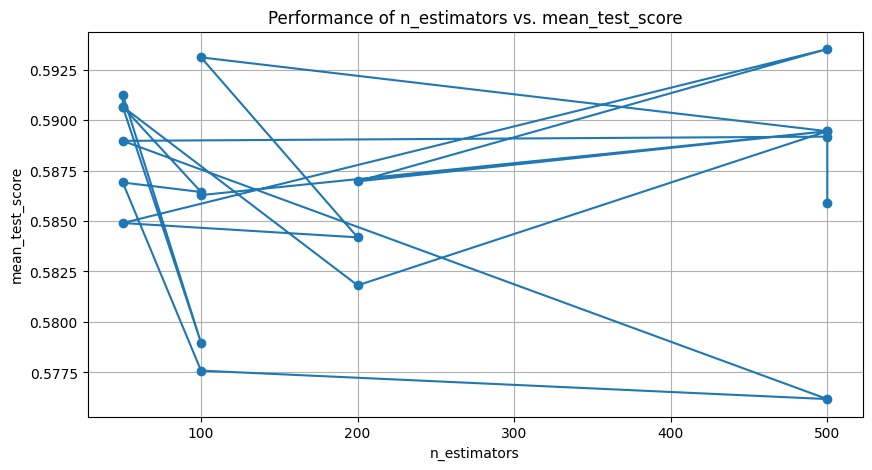

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the cv_results_ to a DataFrame for easier manipulation
results_df = pd.DataFrame(classifier.cv_results_)

# Plot mean test scores for each hyperparameter
def plot_hyperparameter_tuning(results_df, param_name, metric='mean_test_score'):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df['param_' + param_name], results_df[metric], marker='o')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.title(f'Performance of {param_name} vs. {metric}')
    plt.grid(True)
    plt.show()

# Plotting the mean test scores for various hyperparameters
plot_hyperparameter_tuning(results_df, 'n_estimators')


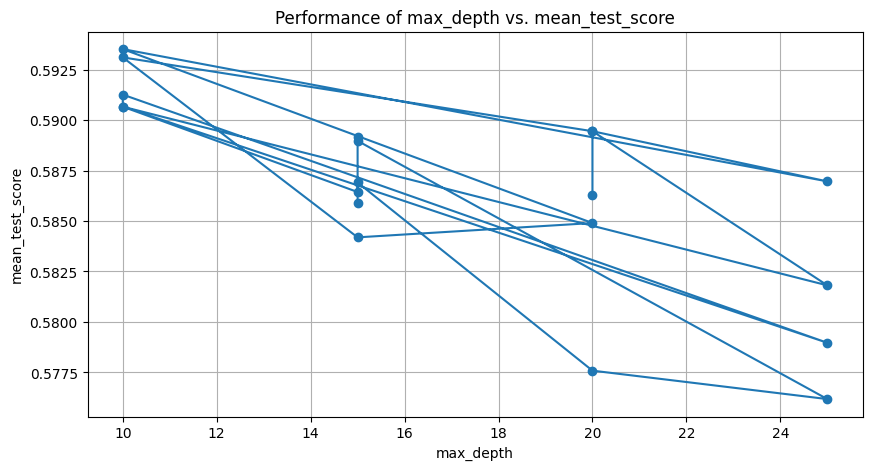

In [160]:
plot_hyperparameter_tuning(results_df, 'max_depth')



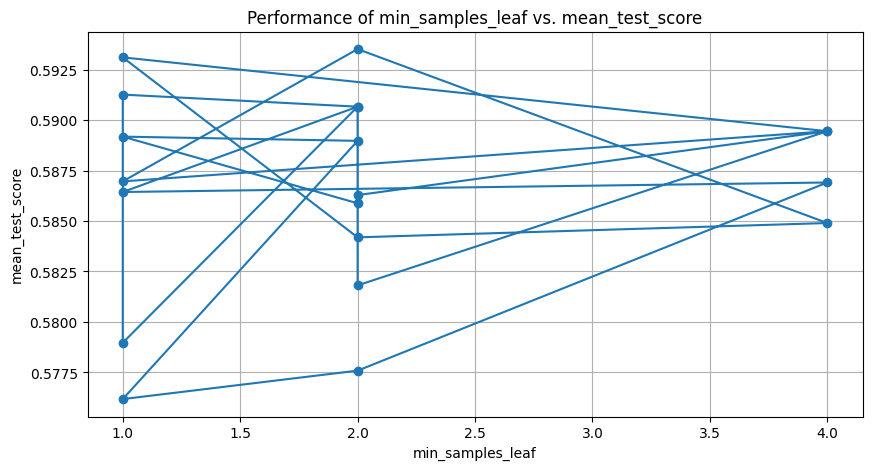

In [161]:
plot_hyperparameter_tuning(results_df, 'min_samples_leaf')


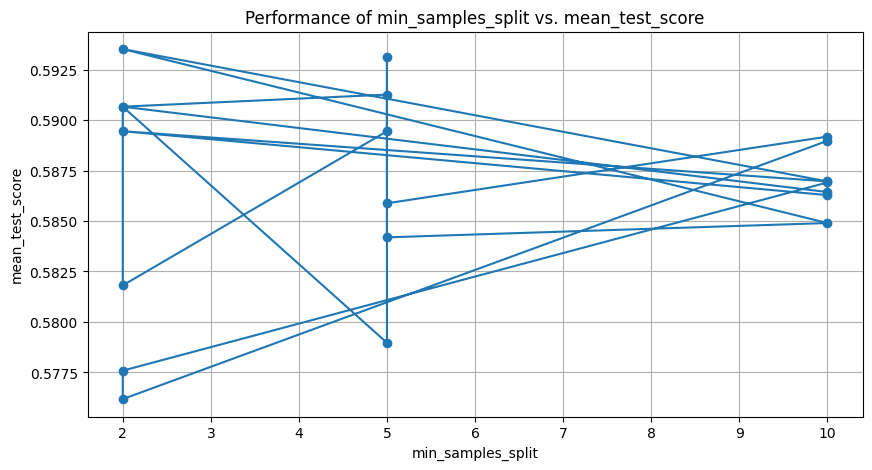

In [162]:
plot_hyperparameter_tuning(results_df, 'min_samples_split')

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the best model from RandomizedSearchCV for predictions
best_model = classifier.best_estimator_

print("BEST ESTIMATOR =",classifier.best_estimator_)

# Generate predictions
y_pred = best_model.predict(X_test_std)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


BEST ESTIMATOR = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=500, random_state=101)
Mean Absolute Error (MAE): 750.7612542278606
Mean Squared Error (MSE): 1112954.3127286884
Root Mean Squared Error (RMSE): 1054.966498391626
R² Score: 0.5916310589484588


### 1. Relative Feature Importance


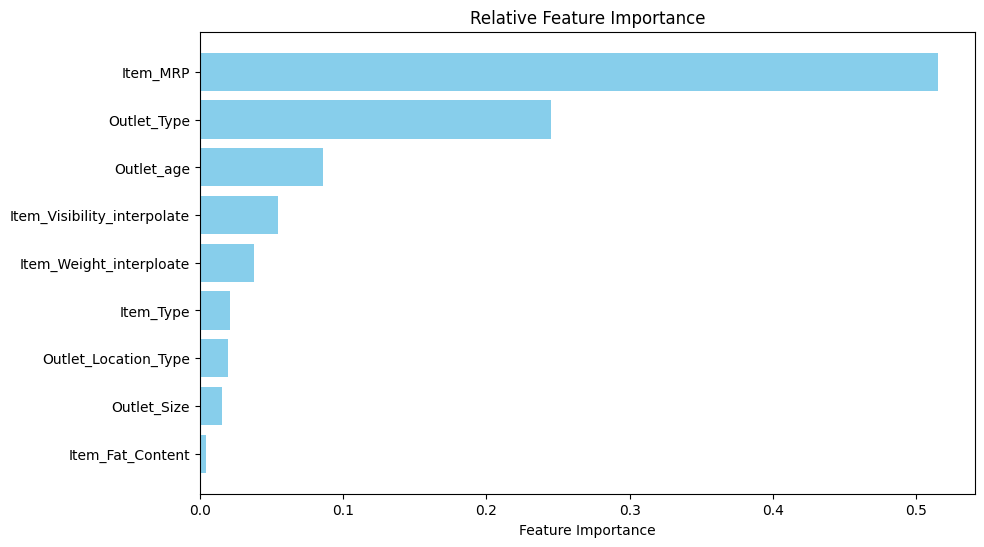

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame to organize and sort feature importance
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Relative Feature Importance')
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order
plt.show()


### 2.  Estimators vs MSE

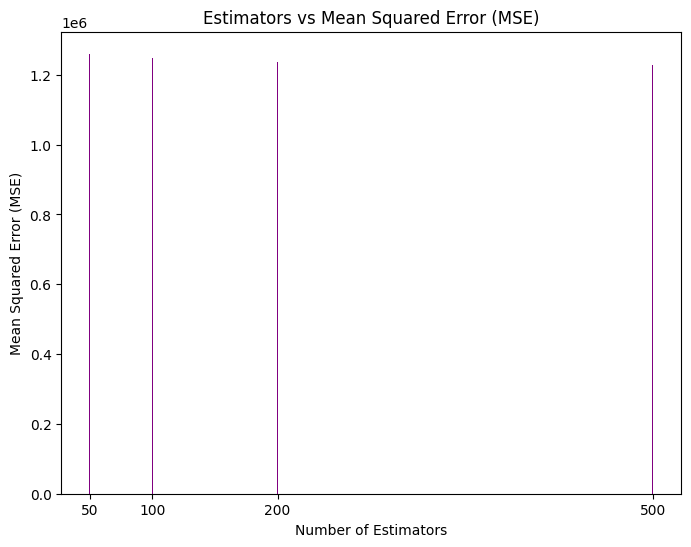

In [165]:
from sklearn.metrics import mean_squared_error

# Define the number of estimators to evaluate
estimators = [50, 100, 200, 500]
mse_scores = []  # Collect MSE scores here

for est in estimators:
    model = RandomForestRegressor(n_estimators=est, random_state=101)
    model.fit(X_train_std, Y_train)
    predictions = model.predict(X_test_std)
    mse = mean_squared_error(Y_test, predictions)
    mse_scores.append(mse)

# Plot Estimators vs MSE
plt.figure(figsize=(8, 6))
plt.bar(estimators,mse_scores, color='purple')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Estimators vs Mean Squared Error (MSE)')
plt.xticks(estimators)  # Ensure all bars are labeled
plt.show()


### 3. Error Rate (RMSE) Chart for Different Hyperparameter Combinations


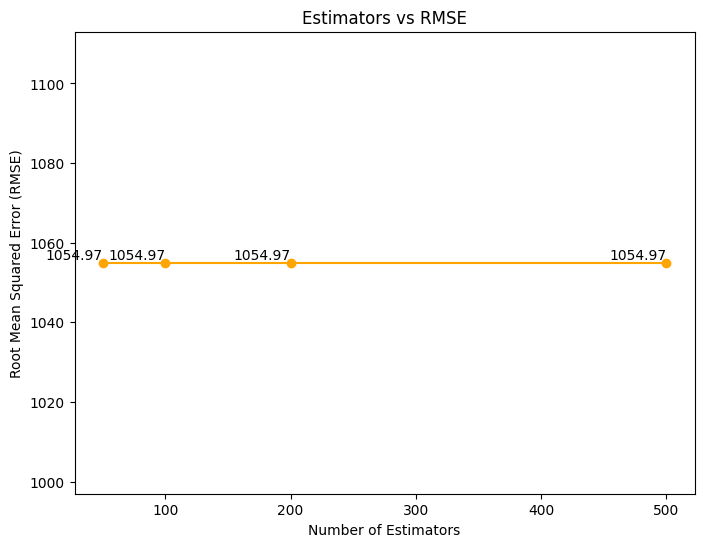

In [166]:
# Collect RMSE values from each parameter combination in the GridSearchCV results
rmse_values = [np.sqrt(abs(mean_squared_error(Y_test, best_model.predict(X_test_std)))) for _ in estimators]

# Plotting RMSE for different estimator values
plt.figure(figsize=(8, 6))
plt.plot(estimators, rmse_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Estimators vs RMSE')

# Annotate each point with its RMSE value
for i, (estimator, rmse) in enumerate(zip(estimators, rmse_values)):
    plt.text(estimator, rmse, f"{rmse:.2f}", ha='right', va='bottom', color='black')

plt.show()


### 4. Scatterplot of Actual vs Predicted Values


In [167]:
y_pred

array([1478.73385915, 2811.76867583, 1375.64456379, ...,  442.00077861,
       1727.24391142, 2606.23233961])

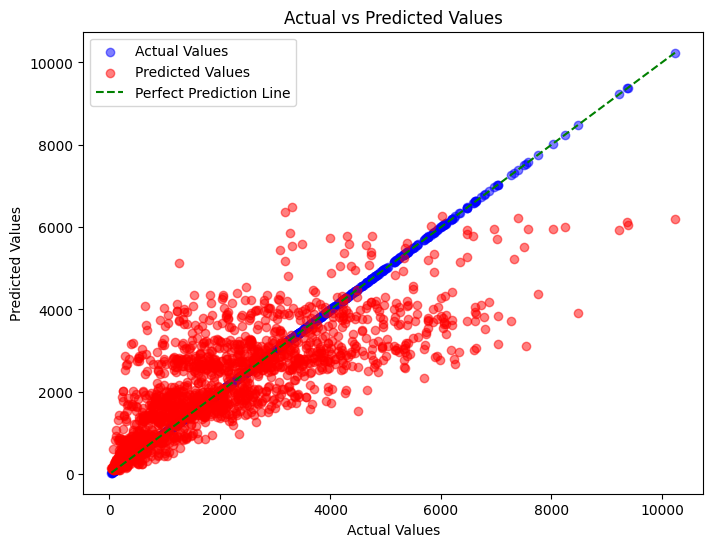

In [168]:
import matplotlib.pyplot as plt

# Plotting both actual and predicted values in different colors
plt.figure(figsize=(8, 6))

# Actual values in blue
plt.scatter(Y_test, Y_test, alpha=0.5, color='blue', label='Actual Values')

# Predicted values in red
plt.scatter(Y_test, y_pred, alpha=0.5, color='red', label='Predicted Values')

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='green', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()  # Add a legend to differentiate

plt.show()


In [169]:
best_model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=500, random_state=101)

In [170]:
import joblib

In [171]:
joblib.dump(best_model,r'D:\Desktop_documents\7th_Semester\UNIVERSITY\VAC\models\best_model.sav')


['D:\\Desktop_documents\\7th_Semester\\UNIVERSITY\\VAC\\models\\best_model.sav']

In [172]:
model=joblib.load(r'D:\Desktop_documents\7th_Semester\UNIVERSITY\VAC\models\best_model.sav')
model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=500, random_state=101)

In [173]:
feature_names = X_train.columns  # If X_train is a pandas DataFrame
print(feature_names)


Index(['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight_interploate',
       'Item_Visibility_interpolate', 'Outlet_age'],
      dtype='object')


In [174]:
pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\HP\AppData\Roaming\Python\Python312\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: dtale
Note: you may need to restart the kernel to use updated packages.
